# **Librerías y carga de datos**
En esta sección se importan todas las libreríaas que son necesarias para la limpieza y transformación de los datos.

In [140]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión con Drive
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

# Gestión de librerías
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Se realiza la carga de los archivos desde la fuente: https://medata.gov.co/
# Luego de realizar la carga se concatenan todos los dataframes para obtener un solo Dataset
# ==============================================================================

# Función para cargar un CSV sin verificar SSL
def load_csv_no_ssl(url):
    response = requests.get(url, verify=False)
    return pd.read_csv(StringIO(response.text))

# Cargar todos los archivos CSV
df_finan = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000009/hurto_a_entidad_financiera.csv')
df_comer = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000010/hurto_a_establecimiento_comercial.csv')
df_person = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000011/hurto_a_persona.csv')
df_resi = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000012/hurto_a_residencia.csv')
df_car = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000013/hurto_de_carro.csv')
df_mot = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000014/hurto_de_moto.csv')
df_semo = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000015/hurto_de_semoviente.csv')
df_pira = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000016/hurto_por_pirateria_terrestre.csv')
df_publi = load_csv_no_ssl('https://medata.gov.co/sites/default/files/distribution/1-027-23-000308/hurto_a_persona_transporte_publico.csv')

d = pd.concat([df_finan, df_comer, df_person, df_resi, df_car, df_mot, df_semo, df_pira, df_publi])

In [142]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          579182 non-null  object 
 1   cantidad             579182 non-null  float64
 2   latitud              497039 non-null  float64
 3   longitud             497039 non-null  float64
 4   sexo                 579182 non-null  object 
 5   edad                 579182 non-null  int64  
 6   estado_civil         579182 non-null  object 
 7   grupo_actor          579182 non-null  object 
 8   actividad_delictiva  579182 non-null  object 
 9   parentesco           579182 non-null  object 
 10  ocupacion            579182 non-null  object 
 11  discapacidad         579182 non-null  object 
 12  grupo_especial       579182 non-null  object 
 13  medio_transporte     579182 non-null  object 
 14  nivel_academico      579182 non-null  object 
 15  testigo              57

# **Datos Originales**


Los datos originales provienen del sitio web oficial gubernamental Datos Abiertos. Estos datos contienen variables claves para la problemática de hurtos en la ciudad de Medellín, como lo son: el tipo de hurto, características de la persona hurtada y del hecho, su ubicación y fechas. Los datos se pueden extraer directamente del sitio web mediante el link de descarga.

El dataset contiene un total de 579182 registros y 36 columnas. Cada registro representa un incidente de hurto en Medellín en distintas modalidades, detallando características del suceso y del entorno. El acceso a estos datos es abierto, ya que proviene de fuentes públicas, permitiendo su uso para fines académicos.

**Tabla de variables**  

|*Nombre de la variable*|*Anterior tipo de variable*|*Descripción*|  
| - | - | - |  
|fecha_hecho|Texto|fecha en que ocurrió el hecho|  
|cantidad|Número|cantidad que debe ser entendida en el contexto de la unidad de medida (siempre es 1)|
|latitud|Número|latitud geográfica sistema de coordenadas wgs84|
|longitud|Número|longitud geográfica|
|sexo|Texto|sexo de la víctima, o cuando lo que se mide es la comisión de un delito del presunto indiciado|
|edad|Número|edad de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado|
|estado_civil|Texto|estado civil de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado|
|grupo_actor|Texto|de la víctima, o cuando lo que se mide es la comisión de un delito, será del presunto indiciado. El grupo actor indica el grupo ej. Guerrilla, Paramilitares etc|
|actividad_delictiva|Texto|actividad ilegal a la que se dedica la víctima o el presunto indiciado. Mirar en contexto con conducta|
|parentesco|Texto|parentesco entre la víctima y el presunto indiciado|
|ocupacion|Texto|ocupación de la víctima o del presunto indiciado, Mirar en contexto con conducta|
|discapacidad|Texto|condición de movilidad reducida de la víctima o indiciado|
|grupo_especial|Texto|indica grupos especiales, que están asociados de por vida a la persona y que hacen que sean más vulnerables a un hecho en particular|
|medio_transporte|Texto|medio transporte donde se movilizaba la víctima o el presunto indiciado según el caso|
|nivel_academico|Texto|nivel acádemico de la víctima o el presunto indiciado según el caso|
|testigo|Texto|indica si hubo o no un testigo de los hechos|
|conducta|Texto|es el inventario de indicadores o hechos asociados a la seguridad y convivencia|
|modalidad|Texto|es la forma como se materializa el hecho|
|caracterizacion|Texto|variable que permite analizar y tipificar la conducta|
|conducta_especial|Texto|una forma de caracterización adicional|
|arma_medio|Texto|es el arma, medio o mecanísmo con el que se comete el hecho|
|articulo_penal|Texto|artículos del código penal o del código de contravenciones de Policía|
|categoria_penal|Texto|caracterización de algunos tipos penales|
|nombre_barrio|Texto|nombre del barrio donde ocurrieron los hechos|
|codigo_barrio|Texto|código del barrio donde ocurrieron los hechos|
|codigo_comuna|Texto|código de la comuna donde ocurrieron los hechos|
|lugar|Texto|lugar donde ocurrieron los hechos. El lugar es una tipificación del urbanismo más cercano al hecho|
|sede_receptora|Texto|entidad que recepcionó el caso|
|bien|Texto|nombre del bien|
|categoria_bien|Texto|agrupación de bienes, nivel intermedio de agregación|
|grupo_bien|Texto|agrupación de bienes, nivel alto de agregación|
|modelo|Número|modelo del bien|
|color|Texto|color del bien|
|permiso|Texto|tipo de permiso de porte que tiene el bien|
|unidad_medida|Texto|unidad del bien|
|fecha_ingestion|Texto|Fecha de ingestión de los datos|

# **Datset**
Para obtener el dataset final a utilizar en la estimación de los modelos, se hizo la preparación de los datos en diferentes etapas:
1. Limpieza de datos
2. Transformaciones
3. Creación de nuevas columnas
4. Manejo de datos nulos
5. Agrupación
6. Manejo de valores atípicos


## Limpieza de datos (Data Cleaning)

In [143]:
# Se realiza una unificación de palabras no válidas
# Estas se reemplazan por nulos para luego darles su debido manejo
# También, se corrigen los tipos de datos
# ==============================================================================
d.replace('Sin dato',np.nan,inplace=True)
d.replace('Sin dato',np.nan,inplace=True)
d.replace('SIN DATO',np.nan,inplace=True)
d.replace('NaN',np.nan,inplace=True)
d.convert_dtypes()
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 36 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_hecho          579182 non-null  object 
 1   cantidad             579182 non-null  float64
 2   latitud              497039 non-null  float64
 3   longitud             497039 non-null  float64
 4   sexo                 520000 non-null  object 
 5   edad                 579182 non-null  int64  
 6   estado_civil         458129 non-null  object 
 7   grupo_actor          0 non-null       float64
 8   actividad_delictiva  0 non-null       float64
 9   parentesco           0 non-null       float64
 10  ocupacion            0 non-null       float64
 11  discapacidad         0 non-null       float64
 12  grupo_especial       0 non-null       float64
 13  medio_transporte     522206 non-null  object 
 14  nivel_academico      0 non-null       float64
 15  testigo              0 

In [144]:
# Se deciden eliminar las columnas que no tienen datos
# También se eliminan columnas redundantes o no valiosas para el estudio
# ==============================================================================
d.drop(['grupo_actor', 'actividad_delictiva', 'parentesco', 'ocupacion', 'discapacidad', 'grupo_especial',
        'nivel_academico', 'testigo', 'caracterizacion','articulo_penal','categoria_penal','permiso','unidad_medida',
        'color', 'cantidad','fecha_ingestion', 'categoria_bien', 'bien','modelo','conducta_especial','latitud', 'longitud','codigo_barrio'], axis=1, inplace=True)

d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   fecha_hecho       579182 non-null  object
 1   sexo              520000 non-null  object
 2   edad              579182 non-null  int64 
 3   estado_civil      458129 non-null  object
 4   medio_transporte  522206 non-null  object
 5   conducta          579182 non-null  object
 6   modalidad         550447 non-null  object
 7   arma_medio        545805 non-null  object
 8   nombre_barrio     571067 non-null  object
 9   codigo_comuna     571067 non-null  object
 10  lugar             571844 non-null  object
 11  sede_receptora    559473 non-null  object
 12  grupo_bien        535023 non-null  object
dtypes: int64(1), object(12)
memory usage: 61.9+ MB


In [145]:
# Creación de variables con el nombre de las columnas según su tipo
# ==============================================================================
numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = d.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

# Visualización necesaria para conocer la distribución de las variables categóricas
# También  se aprovecha para visualizar su frecuencia
# ==============================================================================
for col in catCols:
  print("="*13 + f" {col} " + "="*15)
  print(d[col].value_counts())
  print()

============= fecha_hecho ===============
fecha_hecho
2018-12-05T00:00:00.000-05:00    142
2018-12-13T00:00:00.000-05:00    110
2018-12-06T00:00:00.000-05:00    105
2018-12-04T00:00:00.000-05:00     95
2018-12-07T00:00:00.000-05:00     90
                                ... 
2023-02-07T07:20:00.000-05:00      1
2017-12-01T08:50:00.000-05:00      1
2023-02-07T06:37:00.000-05:00      1
2017-12-01T06:30:00.000-05:00      1
2018-11-22T18:00:00.000-05:00      1
Name: count, Length: 243424, dtype: int64

============= sexo ===============
sexo
Hombre    331317
Mujer     188683
Name: count, dtype: int64

============= estado_civil ===============
estado_civil
Soltero(a)                262888
Casado(a)                 101800
Unión marital de hecho     73893
Divorciado(a)              14449
Viudo(a)                    5099
Name: count, dtype: int64

============= medio_transporte ===============
medio_transporte
Caminata                      371056
Automóvil                      47988
Motocicle

In [146]:
# Ya que la columna 'edad' cuenta con valores negativos, estos se reemplazan por nulos
# ==============================================================================
d['edad'] = d['edad'].replace(-1, np.nan)

In [147]:
# Se considera la variable 'fecha_hecho' importante para el estudio
# Se decide extraer de ella el día, mes y hora, ya que su subdivisión es más útil para el análisis
# ==============================================================================

# Estandarización de las variables obtenidas de 'fecha_hecho'
d['fecha_hecho'] = pd.to_datetime(d['fecha_hecho'], errors='coerce')

# Extraer el día y el mes en nuevas columnas
d['día'] = d['fecha_hecho'].dt.day
d['mes'] = d['fecha_hecho'].dt.month
d['hora'] = d['fecha_hecho'].dt.hour

# Eliminar columna Fecha (columna original)
d.drop('fecha_hecho', axis = 1, inplace = True)

Ya que las variables categóricas cuentan con múltiples valores con poca frecuencia, se deciden realizar agrupamientos y estandarizaciones que posibiliten un mejor manejo, análisis y visualización de estas variables.

In [148]:
# Estandarización de la variable 'estado_civil'
d['estado_civil'] = d['estado_civil'].replace({'Soltero(a)':'soltero',
                                               'Casado(a)':'casado',
                                               'Divorciado(a)':'divorciado',
                                               'Viudo(a)':'viudo',
                                               'Unión marital de hecho': 'union_libre'})

In [149]:
# Estandarización de la variable 'medio_transporte'
d['medio_transporte'] = d['medio_transporte'].replace({'Motocicleta con parrillero':'vehiculo',
                                                       'Automóvil':'vehiculo',
                                                       'Autobus':'transporte publico',
                                                       'Taxi':'transporte publico',
                                                       'Metro':'transporte publico',
                                                       'Automóvil':'vehiculo',
                                                       'Motocicleta':'vehiculo',
                                                       'Bicicleta':'vehiculo',
                                                       'Planeador':'vehiculo'
                                                       })

In [150]:
# Agrupación de la variable 'modalidad'
grupo_delito = {
    'Atraco': 'violentos',
    'Raponazo': 'violentos',
    'Rompimiento cerradura': 'saqueo',
    'Rompimiento de ventana': 'violentos',
    'Rompimiento de caja fuerte': 'violentos',
    'Rompimiento de pared': 'violentos',
    'Forcejeo': 'violentos',
    'Arma de fuego': 'violentos',
    'Enfrentamiento con la fuerza pública': 'violentos',
    'Desvalijar o descuartizar': 'violentos',
    'Violencia intrafamiliar': 'violentos',
    'Descuido': 'fraude',
    'Engaño': 'fraude',
    'Escopolamina': 'fraude',
    'Llave maestra': 'fraude',
    'Clonación de tarjeta': 'fraude',
    'Suplantación': 'fraude',
    'Abuso de confianza': 'fraude',
    'Llamada millonaria': 'fraude',
    'Simulando necesidad': 'fraude',
    'Retención de tarjeta': 'fraude',
    'Cosquilleo': 'saqueo',
    'Halado': 'saqueo',
    'Mechero': 'saqueo',
    'Ventosa': 'saqueo',
    'Paquete chileno': 'saqueo',
    'Fleteo': 'saqueo',
    'Informático': 'tecnologico',
    'Clásica': 'tecnologico',
    'Reten ilegal': 'tecnologico',
    'Comisión de delito': 'otro',
    'Vandalismo': 'otro',
    'Tóxico o agente químico': 'otro',
    'Miedo o terror': 'otro',
    'Taquillazo': 'otro',
    'Retención de dinero': 'otro',
    'Arreo': 'otro',
    'Auto robo': 'otro'
}

# Reemplazar en el DataFrame
d['modalidad'] = d['modalidad'].replace(grupo_delito)

In [151]:
# Estandarización de la variable 'arma_medio'
arma_tipo_replace = {
    'Arma de fuego': 'fuego',
    'Arma cortopunzante': 'blancas',
    'Objeto contundente': 'Objetos_contundentes',
    'Llave maestra': 'otro',
    'Escopolamina': 'químicas',
    'Palanca': 'Objetos_contundentess',
    'Perro': 'otro',
    'Tóxico o Químico': 'químicas',
    'No': 'Sin_arma'
}

# Reemplazar en el DataFrame
d['arma_medio'] = d['arma_medio'].replace(arma_tipo_replace)

In [152]:
# Agrupamiento de la variable 'sede_receptora'
agrupamiento_sede_receptora = {
    'Medellín': 'otro',
    'Itagüí': 'otro',
    'Área investigativa delitos contra el patrimonio económico': 'otro',
    'Bello': 'otro',
    'Envigado': 'otro',
    'Terminal del norte': 'otro',
    'Terminal del sur': 'otro',
    'Aeropuerto Olaya Herrera': 'otro',
    'Sabaneta': 'otro',
    'Copacabana': 'otro',
    'Otro': 'otro',
    'La Estrella': 'otro',
    'Girardota': 'otro',
    'Caldas': 'otro',
    'Barbosa': 'otro',
    'Policía comunitaria': 'otro',
    'Sistema Metro': 'otro',
    'Grupo de protección infancia y adolescencia': 'otro'
}

# Reemplazar en el DataFrame
d['sede_receptora'] = d['sede_receptora'].replace(agrupamiento_sede_receptora)

In [153]:
# Diccionario de agrupamiento de la varible 'lugar'
agrupamiento_lugares = {

     'transportes': [
        'Terminal de transporte', 'Aeropuerto', 'Estación del Metro',
        'Metro Plus', 'Puente peatonal', 'Peaje','Vehículo particular',
        'Sistema Metro', 'Transporte fluvial o marítimo','Metro'
        'Bus de servicio público'
    ],

    'comerciales': [
        'Banco', 'Almacén tienda y otro', 'Fábrica o empresa', 'Local comercial',
        'Supermercado', 'Restaurante', 'Centro comercial', 'Casa de apuesta',
        'Compraventa', 'Panadería', 'Bar o cantina', 'Plaza de mercado',
        'Estación de gasolina', 'Centro de belleza o estética', 'Billar',
        'Cafetería', 'Consultorio jurídico', 'Joyería', 'Droguería o farmacia',
        'Plaza de toros', 'Prostíbulo', 'Lavadero de carros', 'Teatro',
        'Café internet', 'Librería', 'Estadero', 'Estación del Metro plus',
        'Paradero de bus', 'Hipodromo',  'Estación de gasolina',
        'Feria de ganado', 'Empresa de transporte', 'Desguazadero',
        'Matadero, carnicería y similar','Taller mecánico','Casino'
    ],

    'habitacionales': [
        'Vía pública', 'Puesto de trabajo', 'Casa de apuesta', 'Bodega',
        'Conjunto residencial', 'Residencia', 'Hotel, motel y hostal',
        'Sede social, club, auditorio o similar', 'Finca', 'Albergue',
        'Hogar de paso', 'Casa o apartamento', 'Caseta de vigilancia empresa',
        'Caseta vigilancia conjunto residencial', 'Sede política','Edificio','Oficina',
        'Gimnasio', 'Teatro'
    ],

     'exteriores': [
        'Zona boscosa', 'Quebrada o rio', 'Reserva natural', 'Represa o laguna',
        'Parqueadero','Escenario deportivo','Piscina','Vía pública','Cementerio', 'Zona despoblada',
        'Parque','Lote baldío','Cajero electrónico','Turístico','Potrero'
    ],

    'otros': [
        'nan',  'Terminal del norte', 'Terminal del sur', 'Sabaneta',
        'Copacabana', 'Otro', 'La Estrella', 'Girardota', 'Caldas', 'Barbosa',
        'Instalación gubernamental', 'Instalación judicial', 'Instalación fuerza pública',
        'Corporación',  'Policía comunitaria', 'Grupo de protección infancia y adolescencia',
        'Laboratorios de procesamiento de droga ílicita',
        'Obra en construcción', 'Montallanta',  'Cárcel', 'Cantera',
        'Hospital o centro de salud' ,'Institución educativa (jardín, primaria o secundaria)',
        'Iglesia', 'Biblioteca','Baño','Funeraria y sala de velación','Institución de educación superior'

    ]
  }

mapa_lugares = {lugar: categoria for categoria, lugares in agrupamiento_lugares.items() for lugar in lugares}

# Reemplazar en el DataFrame
d['lugar'] = d['lugar'].replace(mapa_lugares)

d['lugar'] = d['lugar'].replace({'Bus de servicio público': 'transportes',
                                 'Metro': 'transportes',
                                 np.nan: 'otros'})

Luego de hacer el agrupamiento y estandarización, se vuelve a visualizar las distribuciones de las variables.

In [154]:
# Obtención de nombres de columnas: categóricas y numéricas
numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = d.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

# Revisión final de las transformaciones

for col in catCols:
  print("="*13 + f" {col} " + "="*15)
  print(d[col].value_counts())
  print()

============= sexo ===============
sexo
Hombre    331317
Mujer     188683
Name: count, dtype: int64

============= estado_civil ===============
estado_civil
soltero        262888
casado         101800
union_libre     73893
divorciado      14449
viudo            5099
Name: count, dtype: int64

============= medio_transporte ===============
medio_transporte
Caminata              371056
vehiculo               94905
transporte publico     56245
Name: count, dtype: int64

============= conducta ===============
conducta
Hurto a persona                      353511
Hurto de moto                         86410
Hurto a establecimiento comercial     54399
Hurto a residencia                    42673
Hurto de carro                        39571
Hurto por piratería terrestre          2202
Hurto a entidad financiera              289
Hurto de semoviente                     127
Name: count, dtype: int64

============= modalidad ===============
modalidad
violentos                266835
saqueo             

## Creación de nuevas columnas
Tomando en cuenta la importancia de los barrios, se crean una nueva columna llamada Zonas, la cual facilita el análisis a grandes rasgos.

De manera análoga, se crea la variable 'rango_hora' a partir de la hora de los hechos.

In [155]:
# Creación de la columna 'zona'
agrupamiento_barrios = {
    'Centro': ['La Candelaria', 'El Poblado', 'Laureles', 'Estadio', 'San Diego', 'Guayaquil', 'El Tesoro', 'La Alpujarra', 'La Floresta', 'Plaza de Ferias', 'Robledo', 'Sevilla', 'Granada'],
    'Zona Norte': ['Villa Nueva', 'Los Colores', 'La Aguacatala', 'Bomboná No.1', 'Barrio Colombia', 'Calle Nueva', 'Los Pinos', 'Castilla', 'Guayabal', 'Pedregal', 'Alejandría'],
    'Zona Sur': ['La Mota', 'Lorena', 'Manrique Central No.1', 'San Benito', 'La América', 'Villa Carlota', 'Barrio Colón', 'Los Balsos No.2', 'San Javier No.2'],
    'Occidente': ['Los Naranjos', 'Las Acacias', 'Perpetuo Socorro', 'Calasanz', 'San Bernardo', 'Boston', 'Villa Carlota', 'Campo Valdés No.1', 'La Mota', 'Laureles'],
    'Zona Oriente': ['Campo Amor', 'Las Violetas', 'Diego Echavarría', 'Los Ángeles', 'Aures No.2', 'La Palma', 'San Javier No.2', 'Los Alcázares', 'San Joaquín'],
    'Periferia': ['Pedregal', 'Bello Horizonte', 'Corazón de Jesús', 'San Miguel', 'Las Playas', 'Travesias', 'Trinidad', 'Aures No.1', 'El Rincón', 'Santa Fé'],
    'Otros': ['Universidad de Antioquia', 'Astorga', 'Olaya Herrera', 'San Javier No.1', 'El Pinal', 'Villa Guadalupe', 'Los Alcázares']
}

# Función para clasificar
def clasificar_zona(barrio):
    for zona, barrios in agrupamiento_barrios.items():
        if barrio in barrios:
            return zona
    return 'Centro'


# Creación de columna
d['zona'] = d['nombre_barrio'].apply(clasificar_zona)


In [156]:
# Creación de la columna 'rango_hora'
def clasificar_hora(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

# Aplicamos la función a la columna 'hora' y creamos una nueva columna 'rango_hora'
d['rango_hora'] = d['hora'].apply(clasificar_hora)

d.drop('hora', axis = 1, inplace = True)

## Manejo de Datos Nulos
En primera medida se busca entender cómo están distribuidos los datos nulos con el fin de encontrar posibles patrones.


In [157]:
# Se visualiza nuevamente la información del dataset para identificar la columnas con valores nulos
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579182 entries, 0 to 27021
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sexo              520000 non-null  object 
 1   edad              515059 non-null  float64
 2   estado_civil      458129 non-null  object 
 3   medio_transporte  522206 non-null  object 
 4   conducta          579182 non-null  object 
 5   modalidad         550447 non-null  object 
 6   arma_medio        545805 non-null  object 
 7   nombre_barrio     571067 non-null  object 
 8   codigo_comuna     571067 non-null  object 
 9   lugar             579182 non-null  object 
 10  sede_receptora    559473 non-null  object 
 11  grupo_bien        535023 non-null  object 
 12  día               579182 non-null  int32  
 13  mes               579182 non-null  int32  
 14  zona              579182 non-null  object 
 15  rango_hora        579182 non-null  object 
dtypes: float64(1), int32(2), o

In [158]:
# Entendiendo la distribución de los NaN
# Registros donde varias características son vacías
d.loc[d['sexo'].isna() & d['edad'].isna() & d['estado_civil'].isna() & d['medio_transporte'].isna() & d['modalidad'].isna() & d['arma_medio'].isna()
& d['nombre_barrio'].isna() & d['codigo_comuna'].isna() & d['sede_receptora'].isna() & d['grupo_bien'].isna()]
# Registros donde varias características son vacías: características de las personas
d.loc[d['sexo'].isna() & d['edad'].isna() & d['estado_civil'].isna()]
#  Registros donde varias características son vacías: características del crimen
d.loc[d['medio_transporte'].isna() & d['arma_medio'].isna() & d['modalidad'].isna()]
#  Registros donde varias características son vacías: relacionado a la ubicación
d.loc[d['sede_receptora'].isna() & d['codigo_comuna'].isna() & d['nombre_barrio'].isna()]
# Tomando en cuenta que en el anterior subgrupo hay una relativa pequeña cantidad de datos, se decide que deben ser eliminados
d.drop(d.loc[d['sede_receptora'].isna() & d['codigo_comuna'].isna() & d['nombre_barrio'].isna()].index, inplace=True)

El manejo del resto de datos faltantes se realizará desde cada columna, tomando en cuenta el tipo de dato.



In [159]:
# En las siguientes columnas se llenan los valores faltantes con "no se define"
d['sexo'].fillna('no se define', inplace=True)
d['estado_civil'].fillna('no se define', inplace=True)
d['medio_transporte'].fillna('no se define', inplace=True)
d['modalidad'].fillna('no se define', inplace=True)
d['arma_medio'].fillna('no se define', inplace=True)
d['sede_receptora'].fillna('no se define', inplace=True)
d['grupo_bien'].fillna('no se define', inplace=True)

# En la siguiente columna se eliminan los registros que no tienen barrio, ya que se considera que no se debería imputar información en este caso
d[d['nombre_barrio'].isna()]
d['nombre_barrio'].dropna(inplace=True)

# Para la columna de edad se imputará el promedio de los datos para los valores faltantes
d['edad'].fillna(d['edad'].mean(), inplace=True)

## Agrupación
Ya que la variable a pronosticar es la cantidad de hurtos según el resto de características, se hizo la agrupación del dataset teniendo en cuenta que cada fila de los datos iniciales es un hurto.

Luego de esto, tenemos como resultado un dataset que cuenta la cantidad de hurtos con respecto todas las columnas ya tratadas.

In [160]:
# Agrupación del dataset para obtener la variable respuesta/salida
columns = d.columns
df = d.groupby(d.columns.tolist()).size().reset_index(name='cantidad_hurtos')

## Manejo de valores atípicos
En este caso se tomaron en cuenta la variable de salidad y la edad.

El resto de las columnas numéricas no se tomaron en cuenta porque estas hacen referencia a códigos o fechas y no a valores numéricos como tal.

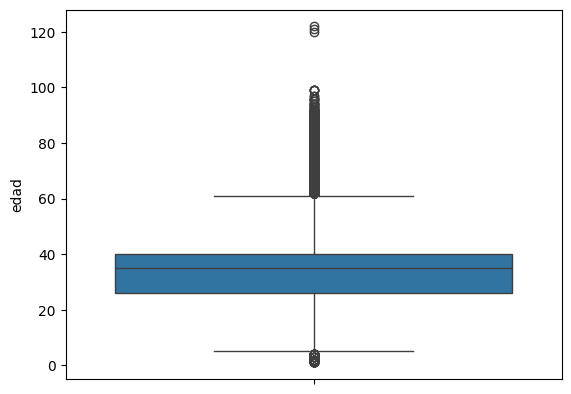

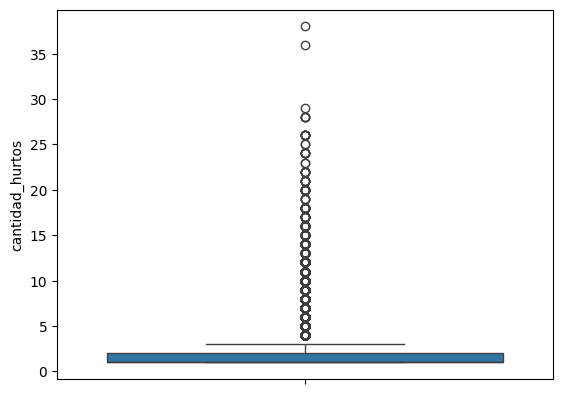

In [161]:
# Descripción de las variables para entender sus mínimos y máximos
df['edad'].describe()
df['cantidad_hurtos'].describe()

# Box plot de la variable 'edad' para visualizar su distribución
sns.boxplot(df['edad'])
plt.show()

# Box plot de la variable 'cantidad_hurtos' para visualizar su distribución
sns.boxplot(df['cantidad_hurtos'])
plt.show()

In [188]:
# Calculo de valores atípicos en 'edad' por medio de percentiles

# Calculo del percentil inferior y el superior
Qinf = np.percentile(df['edad'], 25, interpolation = 'midpoint')
Qsup = np.percentile(df['edad'], 75, interpolation = 'midpoint')

# Cálculo del rango intercuartil
IQR = Qsup - Qinf

# Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Qinf - 1.5*IQR
# Se toma un límite superior más alto para tomar en cuenta que a las personas de avanzada edad también sufren robos
VASup = Qsup + 3.5*IQR

print(f'Valor atípico inferior:{VAInf}')
print(f'Valor atípico superior:{VASup}')

# Se eliminan los valores atípicos
df = df.drop(df[df['edad']>VASup].index)
df = df.drop(df[df['edad']<VAInf].index)

# Se reinicia el índice
df.reset_index(drop=True, inplace=True)

df.info()

Valor atípico inferior:5.0
Valor atípico superior:89.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390524 entries, 0 to 390523
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sexo              390524 non-null  object 
 1   edad              390524 non-null  float64
 2   estado_civil      390524 non-null  object 
 3   medio_transporte  390524 non-null  object 
 4   conducta          390524 non-null  object 
 5   modalidad         390524 non-null  object 
 6   arma_medio        390524 non-null  object 
 7   nombre_barrio     390524 non-null  object 
 8   codigo_comuna     390524 non-null  object 
 9   lugar             390524 non-null  object 
 10  sede_receptora    390524 non-null  object 
 11  grupo_bien        390524 non-null  object 
 12  día               390524 non-null  int32  
 13  mes               390524 non-null  int32  
 14  zona              390524 non-null  object 
 15  rango_hora   

In [190]:
# Lista de valores atípicos en la variable de salida

# Ser crea un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# Se identifican los valores atípicos por medio de lof
y_pred = lof.fit_predict(df[['cantidad_hurtos']])

# Se identifican los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())

# Se eliminan los valores atípicos del dataset
df = df.loc[~outliers]

Indices de valores atípicos:  [44781, 51676, 66789, 94579, 108674, 120697, 120852, 127772, 146408, 157024, 157571, 164503, 167614, 174145, 178821, 181510, 205697, 221569, 228021, 238783, 243043, 248525, 253283, 269352, 270695, 306620, 308283, 315921, 319953, 323275, 323683, 327552, 334693, 335463, 336384, 338924, 342367, 346164, 346857, 346999, 350044, 350110, 355272, 363021, 375963, 385489]


# **Analítica descriptiva**
En esta sección se muestra la distribución de los datos y su relación con la variable de salida para conocer mejor el contexto de estos.


## Funciones

In [191]:
# Librerías
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Factor de Inflación de la Varianza VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):

    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],

                            )

            elif plot_type == 'barplot':
                # Boxplot
                sns.barplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            estimator='sum',
                            order=data.groupby(column)[target_var].sum().reset_index().sort_values(by=target_var, ascending=False)[column]
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")



        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

## Visualizaciones

In [192]:
# Distribución de cada variable categórica en el conjunto de datos
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
catCols = df.select_dtypes(include = ["object", 'category', 'string']).columns.tolist()

**Distribución de las variables categóricas**





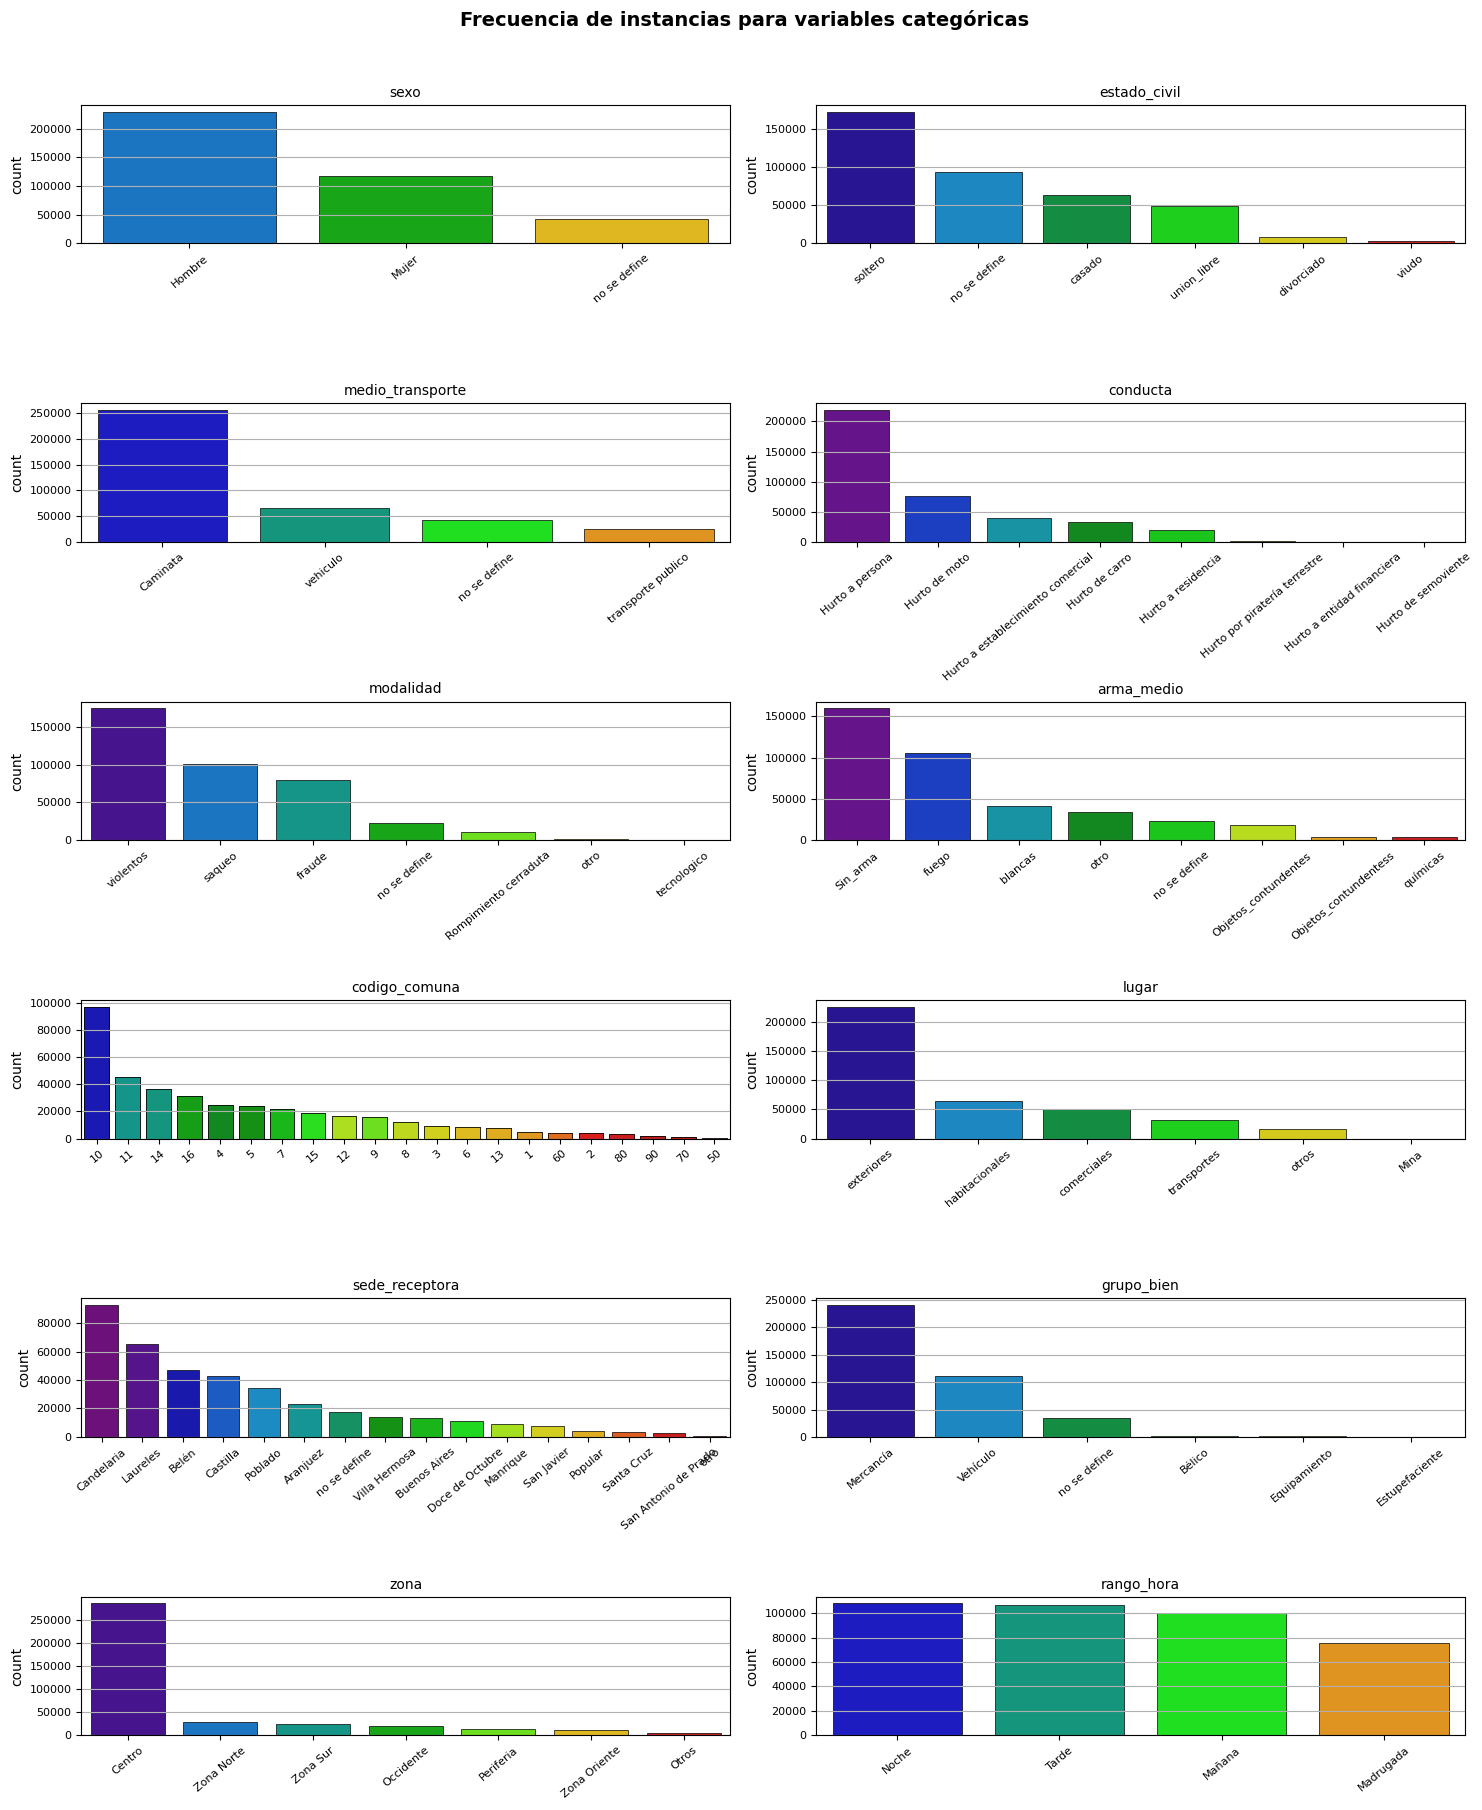

In [193]:
# Se simplifica el nombre de la variable
cols = catCols
# Se remueve la columna de 'nombre_barrio' ya que tiene muchas categorías y no se deben resumir
cols.remove('nombre_barrio')
data = df.reset_index()
# Visualización de frecuencia de instancias para variables categóricas
multiple_plot(2, data , cols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',40)

Con las gráficas anteriores podemos concluir cómo están distribuidos los datos con respecto las variables categóricas, es decir, de qué categorías dentro de cada variable hay más y menos datos. Un ejemplo de estas conclusiones es::

1. Se tienen más datos de hombres hurtados que de mujeres.
2. La distribución de los horarios en el dataset es relativamente uniforme.
3. Se tiene más datos de hurtos realizados en exteriores.

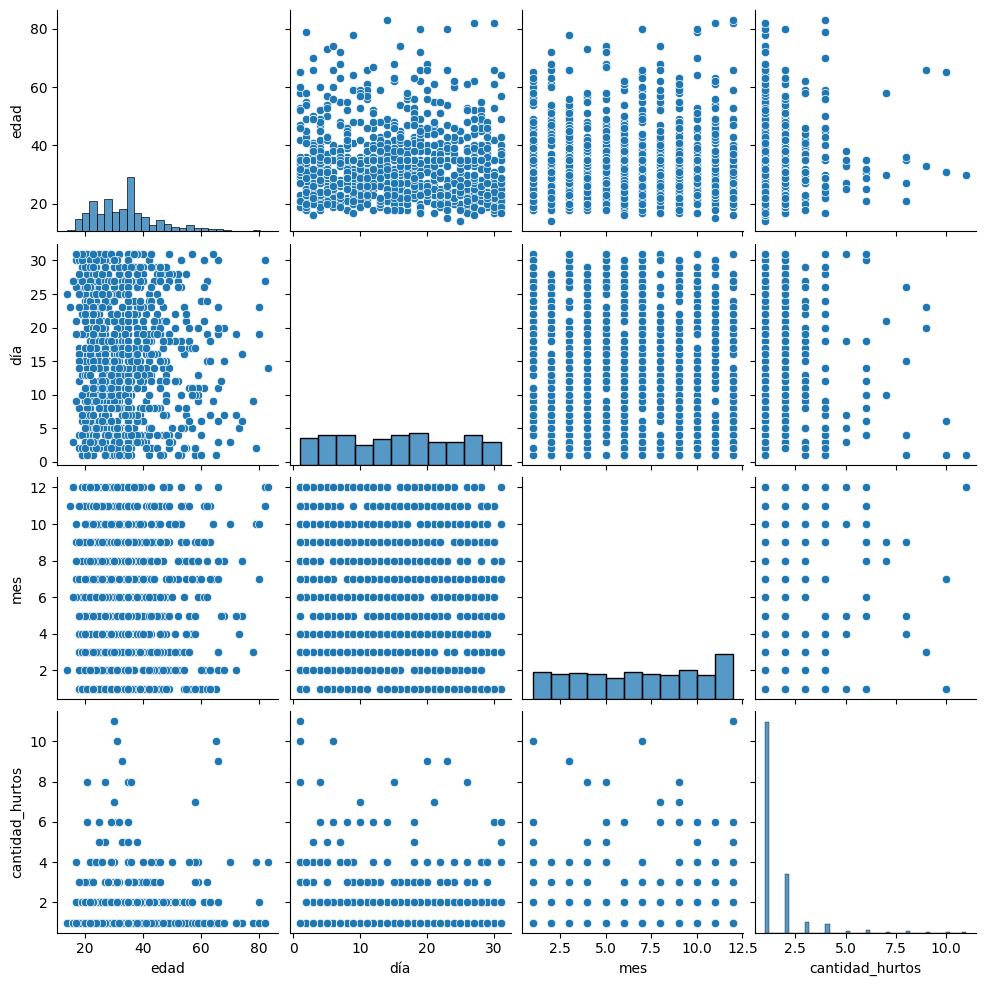

In [194]:
# Visualización de relaciones entre variables numéricas
sns.pairplot(df.sample(1000))

Luego de realizar la revisión de la relación de las variables numéricas, no se encuentra una relación lineal visualmente significante.

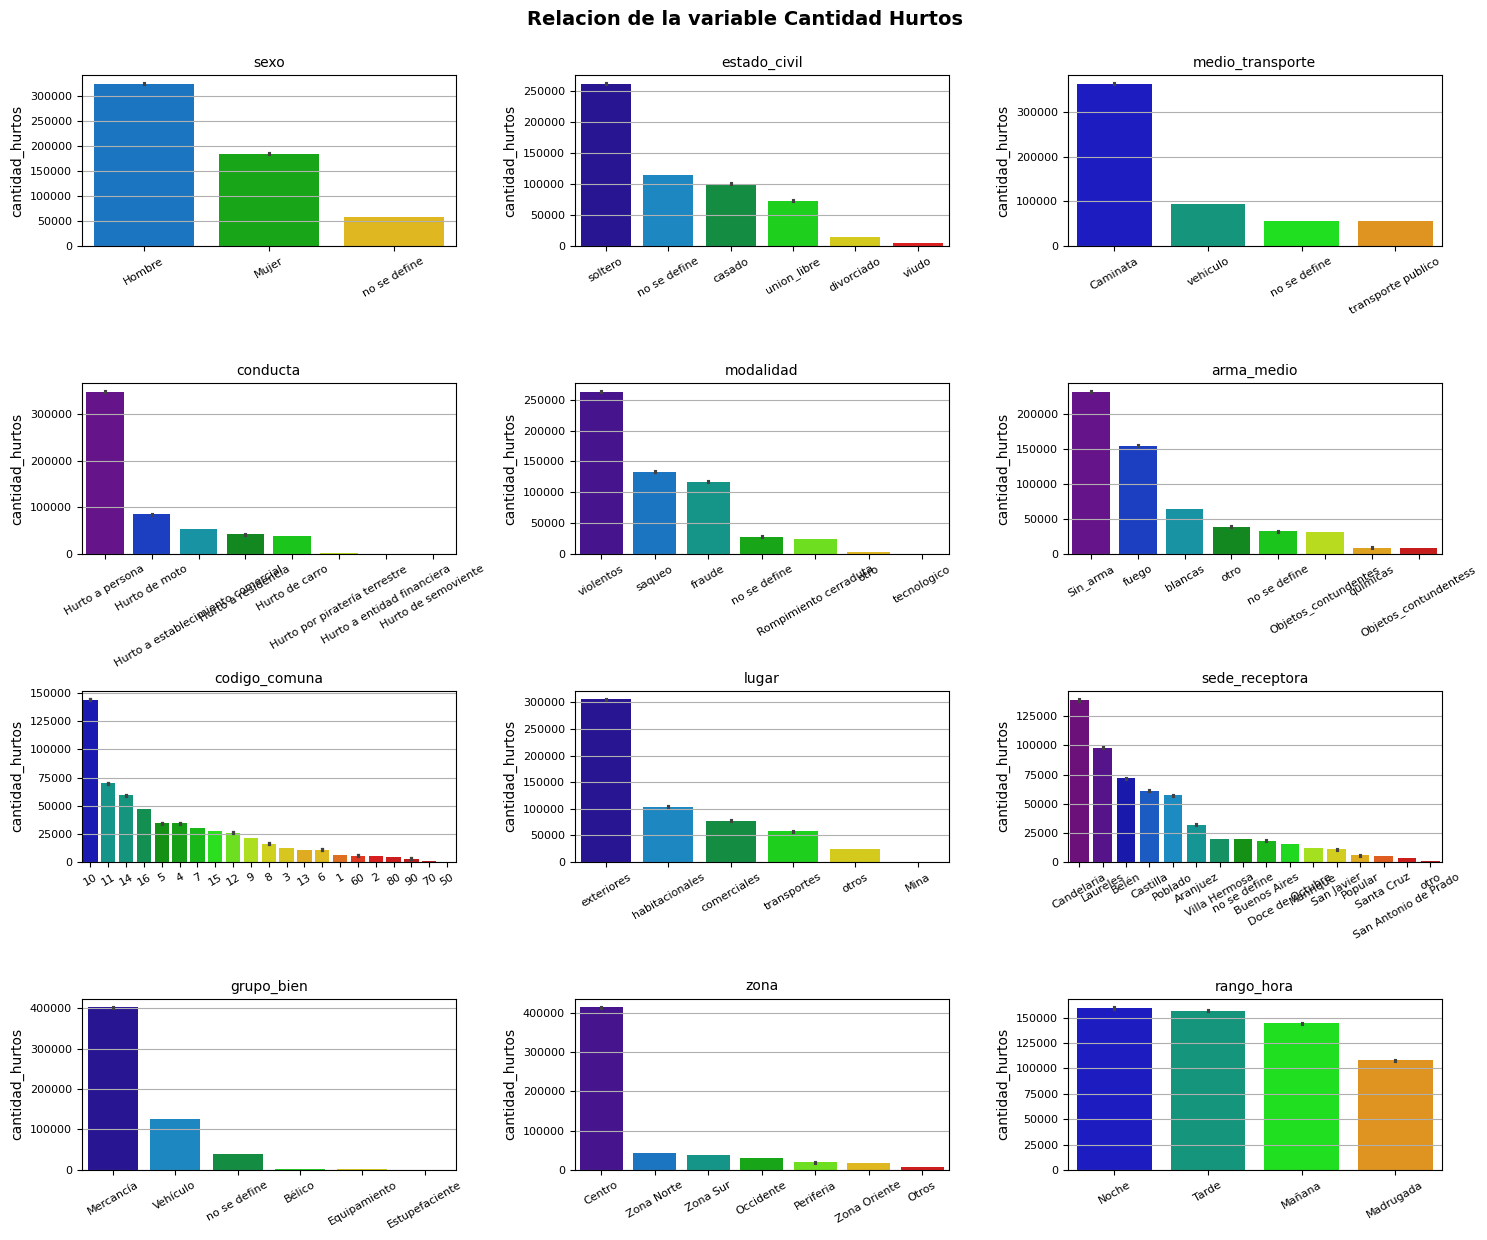

In [195]:
# Relación de las variables categóricas con la variable respuesta/salida
multiple_plot(3, df , cols, 'cantidad_hurtos', 'barplot', 'Relacion de la variable Cantidad Hurtos',30)

Luego de esta revisión se pueden obtener los siguientes resultados preliminares:
1. Son más los hurtos realizados a personas dentro del dataset.
2. La comuna 10 es la comuna con más hurtos.
3. Las personas solteras suelen ser más hurtados respecto a los demás estados civiles.
4. El rango de hora con menos hurtos es la madrugada.
5. Los bienes más hurtados son las mercancías.


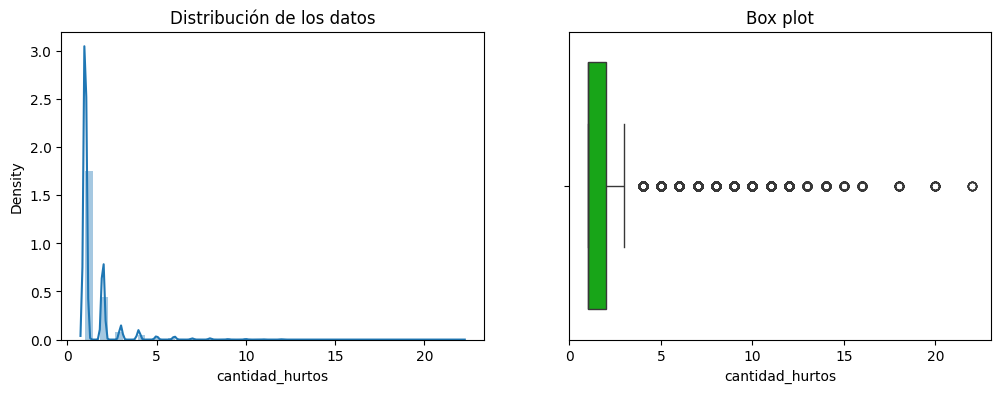

In [196]:
# Distribución de la variable de salida

# Tamaño de los gráficos
plt.figure(figsize=(12,4))

# Gráfico de distribución de la cantidad de hurtos
plt.subplot(1,2,1)
plt.title('Distribución de los datos')
sns.distplot(df['cantidad_hurtos'])

# Box plot de la cantidad de hurtos, en donde se evidencia su distribución
plt.subplot(1,2,2)
plt.title('Box plot')
sns.boxplot(x=df['cantidad_hurtos'], palette='nipy_spectral')

plt.show()

# Exportación de los datos
Se exporta el dataset limpio a un archivo csv.

In [197]:
# Se exportan los datos limpios
df.to_csv('hurtos.csv', index=False)